In [1]:
import pandas as pd

# Loading Dataset 1
df1 = pd.read_csv("AB_NYC_2019.csv")

# Previewing data
df1.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Dataset 1: AB_NYC_2019.csv

* Step 1: Load and Preview the Dataset

In this step, I loaded the dataset using `pandas.read_csv()` and previewed the first few rows with `head()`.

This gives an initial understanding of the structure, columns, and types of data contained. It helps spot obvious issues such as missing values, typos, or formatting problems early on.


In [2]:
# Check data types and non-null counts
df1.info()

# Check for missing values
df1.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

* Step 2: Check for Missing Values

I used `df.info()` and `df.isnull().sum()` to assess data completeness and column data types.

* Findings:
- `name` is missing in 16 rows
- `host_name` is missing in 21 rows
- `last_review` and `reviews_per_month` are missing in 10,052 rows — likely because these listings haven't been reviewed yet.

This tells me where I need to handle missing values — by either imputing (e.g., fill with 0 or "Unknown") or dropping if they're not critical.


In [3]:
# Check for duplicates
df1.duplicated().sum()

# Drop duplicates (if any)
df1 = df1.drop_duplicates()


* Step 3: Remove Duplicates

I checked for duplicate rows using `df.duplicated().sum()`, and the result was `0`.

This indicates that the dataset contains no exact duplicate entries, so no action was needed for this step.


In [4]:
# Standardize column names: lowercase and replace spaces with underscores
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')

# Preview new column names
df1.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

* Step 4: Standardize Column Names

To maintain consistency and improve code readability, I standardized all column names by:
- Converting them to lowercase
- Replacing spaces with underscores

This makes it easier to access columns programmatically and avoids potential errors during analysis or modeling.


In [5]:
# Convert last_review to datetime
df1['last_review'] = pd.to_datetime(df1['last_review'], errors='coerce')

# Confirm the change
df1.dtypes['last_review']


dtype('<M8[ns]')

* Step 5: Handle Data Types

I converted the `last_review` column from object (string) to datetime using `pd.to_datetime()`.

This allows for better date-based analysis later (e.g., calculating time since last review).  
The `errors='coerce'` argument ensures that any invalid date formats are set as NaT (Not a Time).


In [6]:
# Fill missing names and host names with 'Unknown'
df1['name'] = df1['name'].fillna('Unknown')
df1['host_name'] = df1['host_name'].fillna('Unknown')

# Fill missing reviews_per_month with 0 (since those listings have no reviews)
df1['reviews_per_month'] = df1['reviews_per_month'].fillna(0)

# last_review can stay as NaT (already handled in datetime step)


* Step 6: Handle Missing Values and Inconsistencies

To ensure the dataset is clean and usable, I addressed missing values as follows:
- Filled missing `name` and `host_name` entries with `"Unknown"` to retain the records
- Replaced missing `reviews_per_month` values with `0`, assuming no reviews were made
- `last_review` values remain as `NaT` where missing, which is appropriate for datetime analysis

This preserves the dataset size while improving consistency.


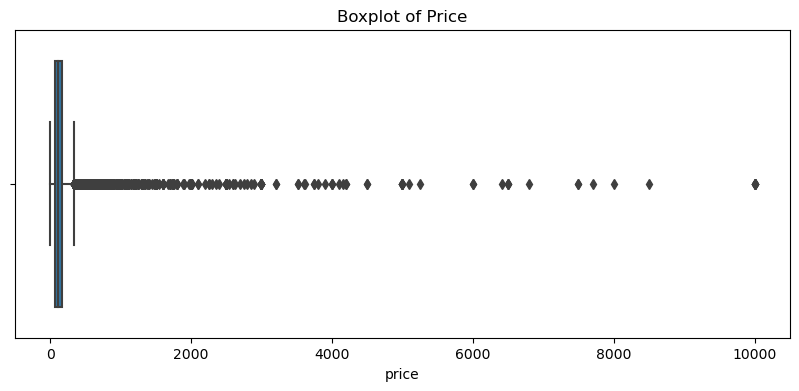

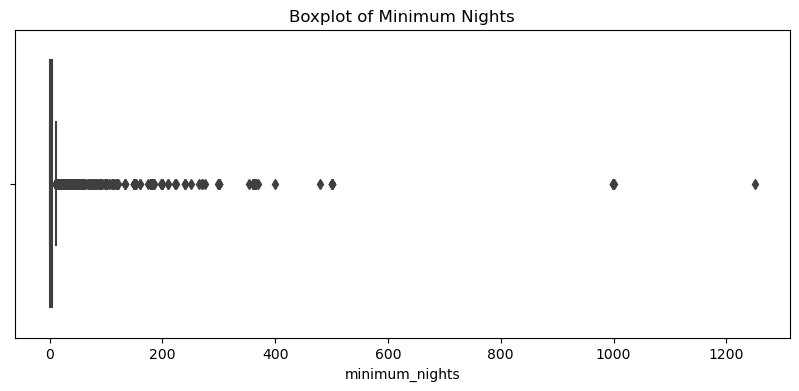

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of price
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['price'])
plt.title('Boxplot of Price')
plt.show()

# Plot distribution of minimum_nights
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['minimum_nights'])
plt.title('Boxplot of Minimum Nights')
plt.show()


In [8]:
# Remove outliers based on practical limits
df1 = df1[df1['price'] <= 1000]  # remove listings with very high price
df1 = df1[df1['minimum_nights'] <= 365]  # remove listings with excessive stay length


* Step 7: Detect and Handle Outliers

I used boxplots to visualize outliers in key numerical columns like `price` and `minimum_nights`.

**Actions taken:**
- Removed listings with `price` greater than $1000 (likely not realistic for typical rentals)
- Removed listings with `minimum_nights` over 365 (likely errors or long-term stays)

This step improves the reliability of insights and model performance by reducing skewness caused by extreme values.


In [9]:
# Save cleaned dataset to CSV
df1.to_csv('AB_NYC_2019_Cleaned.csv', index=False)


* Step 8: Export the Cleaned Dataset

After completing all cleaning steps — handling missing values, removing duplicates, standardizing columns, and eliminating outliers — I saved the cleaned dataset as `AB_NYC_2019_Cleaned.csv`.

This cleaned file is now ready for further analysis, visualization, or machine learning tasks.


In [10]:
import os
os.getcwd()


'C:\\Users\\govin\\OASIS INTERSHIP\\PROJECT 03\\P3 D1'